In [2]:
from graphviz import Digraph

In [34]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        
    def make_graph(self):
        dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
        for node in self.graph:
            dot.node(str(node[0]),str(node[0]))
        for s in self.graph:
            dot.edge(str(s[0]),str(s[1]),label=str(s[2]))
        return dot

    def addEdge(self, src, dest, weight):
        self.graph.append([src, dest, weight])

    def find(self, parent, i):
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])

        return parent[i]

    def union(self, parent, rank, x, y):
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        else:
            parent[y] = x
            rank[x] += 1

    def KruskalMST(self):
        res = []
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda x: x[2])
        parent = []
        rank = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        while e < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            if x != y:
                e += 1
                res.append([u, v, w])
                self.union(parent, rank, x, y)

        minCost = 0
        for u, v, weight in res:
            minCost += weight
            print(f"{u} -> {v} = {weight}")
        print("Minimum Spanning Tree", minCost)

6 -> 7 = 1
2 -> 8 = 2
5 -> 6 = 2
0 -> 1 = 4
2 -> 5 = 4
2 -> 3 = 7
0 -> 7 = 8
3 -> 4 = 9
Minimum Spanning Tree 37


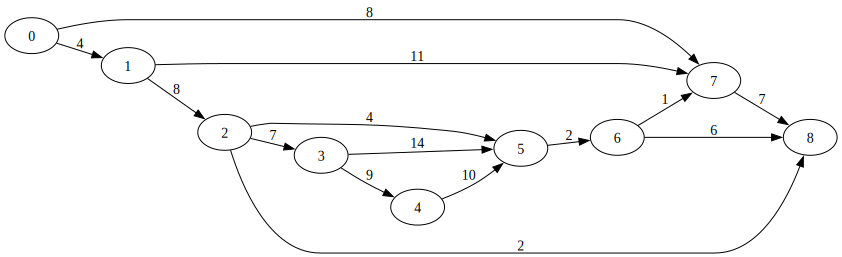

In [36]:
g = Graph(9)
g.addEdge(0, 1, 4)
g.addEdge(0, 7, 8)
g.addEdge(1, 2, 8)
g.addEdge(1, 7, 11)
g.addEdge(2, 3, 7)
g.addEdge(2, 8, 2)
g.addEdge(2, 5, 4)
g.addEdge(3, 4, 9)
g.addEdge(3, 5, 14)
g.addEdge(4, 5, 10)
g.addEdge(5, 6, 2)
g.addEdge(6, 7, 1)
g.addEdge(6, 8, 6)
g.addEdge(7, 8, 7)
g.KruskalMST()
g.make_graph()